# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# **Load Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_val.csv to Cleaned_val (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [ ]:
train_df = pd.read_csv("train (1).csv")
test_df = pd.read_csv("test (1).csv")
val_df = pd.read_csv("Cleaned_val.csv")

In [ ]:
# View Data
print("Training Data:")
display(train_df.head())
print("----------------------------------------------------------------------")
print("Testing Data:")
display(test_df.head())
print("----------------------------------------------------------------------")
print("Validation Data:")
display(val_df.head())

Training Data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


----------------------------------------------------------------------
Testing Data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral


----------------------------------------------------------------------
Validation Data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,10,31,Male,Instagram,170,5,80,20,35,Happiness
1,877,32,Female,Instagram,155,6,75,25,38,Happiness
2,230,26,Non-binary,Facebook,45,1,8,4,12,Sadness
3,876,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
4,376,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     103 non-null    int64 
 1   Age                         103 non-null    object
 2   Gender                      103 non-null    object
 3   Platform                    103 non-null    object
 4   Daily_Usage_Time (minutes)  103 non-null    int64 
 5   Posts_Per_Day               103 non-null    int64 
 6   Likes_Received_Per_Day      103 non-null    int64 
 7   Comments_Received_Per_Day   103 non-null    int64 
 8   Messages_Sent_Per_Day       103 non-null    int64 
 9   Dominant_Emotion            103 non-null    object
dtypes: int64(6), object(4)
memory usage: 8.2+ KB


In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     145 non-null    int64 
 1   Age                         145 non-null    object
 2   Gender                      145 non-null    object
 3   Platform                    145 non-null    object
 4   Daily_Usage_Time (minutes)  145 non-null    int64 
 5   Posts_Per_Day               145 non-null    int64 
 6   Likes_Received_Per_Day      145 non-null    int64 
 7   Comments_Received_Per_Day   145 non-null    int64 
 8   Messages_Sent_Per_Day       145 non-null    object
 9   Dominant_Emotion            144 non-null    object
dtypes: int64(5), object(5)
memory usage: 11.5+ KB


In [ ]:
print(f"There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in the training data.")
print(f"There are {test_df.shape[0]} rows and {test_df.shape[1]} columns in the testing data.")
print(f"There are {val_df.shape[0]} rows and {val_df.shape[1]} columns in the validation data.")

There are 1001 rows and 10 columns in the training data.
There are 103 rows and 10 columns in the testing data.
There are 145 rows and 10 columns in the validation data.


In [ ]:
# checking for null values
print("Training Data:")
display(train_df.isnull().sum())

print("Testing Data:")
display(test_df.isnull().sum())

print("Validation Data:")
display(val_df.isnull().sum())

Training Data:


,0
User_ID,0
Age,0
Gender,1
Platform,1
Daily_Usage_Time (minutes),1
Posts_Per_Day,1
Likes_Received_Per_Day,1
Comments_Received_Per_Day,1
Messages_Sent_Per_Day,1
Dominant_Emotion,1


Testing Data:


,0
User_ID,0
Age,0
Gender,0
Platform,0
Daily_Usage_Time (minutes),0
Posts_Per_Day,0
Likes_Received_Per_Day,0
Comments_Received_Per_Day,0
Messages_Sent_Per_Day,0
Dominant_Emotion,0


Validation Data:


,0
User_ID,0
Age,0
Gender,0
Platform,0
Daily_Usage_Time (minutes),0
Posts_Per_Day,0
Likes_Received_Per_Day,0
Comments_Received_Per_Day,0
Messages_Sent_Per_Day,0
Dominant_Emotion,1


# **EDA**

In [ ]:
# list of coloums in the training data
train_df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [ ]:
train_df.describe()

,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


Age Distribution

In [ ]:
train_df['Age'].isnull().sum()

0

In [ ]:
train_df['Age'].unique()

array(['25', '30', '22', '28', '33', '21', '27', '24', '29', '31', '23',
       '26', '34', '35', '32', 'Male', 'Female', 'Non-binary',
       ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:'],
      dtype=object)

In [ ]:
# Replace non-numeric values with NaN
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')

# Handle NaN values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [ ]:
train_df["Age"].unique()

array([25., 30., 22., 28., 33., 21., 27., 24., 29., 31., 23., 26., 34.,
       35., 32.])

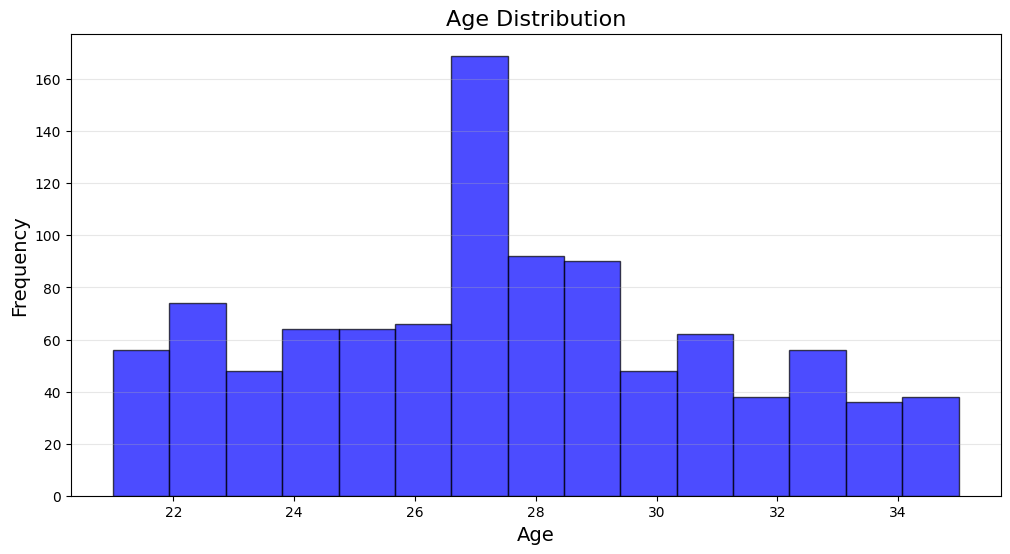

In [ ]:
import matplotlib.pyplot as plt

# Creating a histogram for the 'Age' column with similar styling
plt.figure(figsize=(12, 6))
plt.hist(train_df['Age'], bins=15, color='blue', edgecolor='black', alpha=0.7)  # Adjusting color and transparency
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)  # Adding grid only on y-axis with some transparency

# Display the histogram
plt.show()

Gender Distribution

In [ ]:
train_df['Gender'].unique()

array(['Female', 'Male', 'Non-binary', '27', '24', '29', '33', '31', '22',
       '25', '28', '30', '23', '34', '26', '35', '21', '32', nan],
      dtype=object)

In [ ]:
# Function to replace numeric values with NaN
def clean_gender_column(gender_value):
    try:
        # Try converting the value to float, if it succeeds it's a numeric value
        float(gender_value)
        return np.nan
    except ValueError:
        # If conversion fails, it's a valid gender entry
        return gender_value

# Apply the function to the Gender column
train_df['Gender'] = train_df['Gender'].apply(clean_gender_column)

# Fill NaN values with a placeholder or drop them
train_df = train_df.dropna(subset=['Gender'])

# Verify the unique values after cleaning
print(train_df['Gender'].unique())

['Female' 'Male' 'Non-binary']


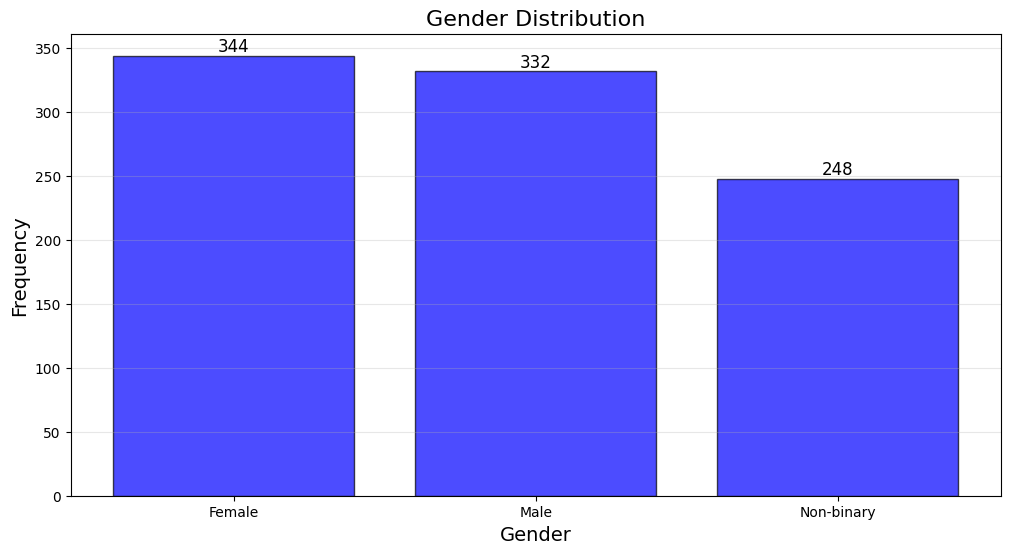

In [ ]:
# Counting the occurrences of each gender
gender_counts = train_df['Gender'].value_counts()

# Creating a bar plot for the 'Gender' column
plt.figure(figsize=(12, 6))
bars = plt.bar(gender_counts.index, gender_counts.values, color='blue', edgecolor='black', alpha=0.7)  # Adjusting color and transparency
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)  # Adding grid only on y-axis with some transparency

# Adding the number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

# Display the bar plot
plt.show()

Platform Distribution

In [ ]:
train_df['Platform'].unique()

array(['Instagram', 'Twitter', 'Facebook', 'LinkedIn', 'Whatsapp',
       'Telegram', 'Snapchat'], dtype=object)

In [ ]:
# filling nan with mode
train_df['Platform'].fillna(train_df['Platform'].mode()[0], inplace=True)

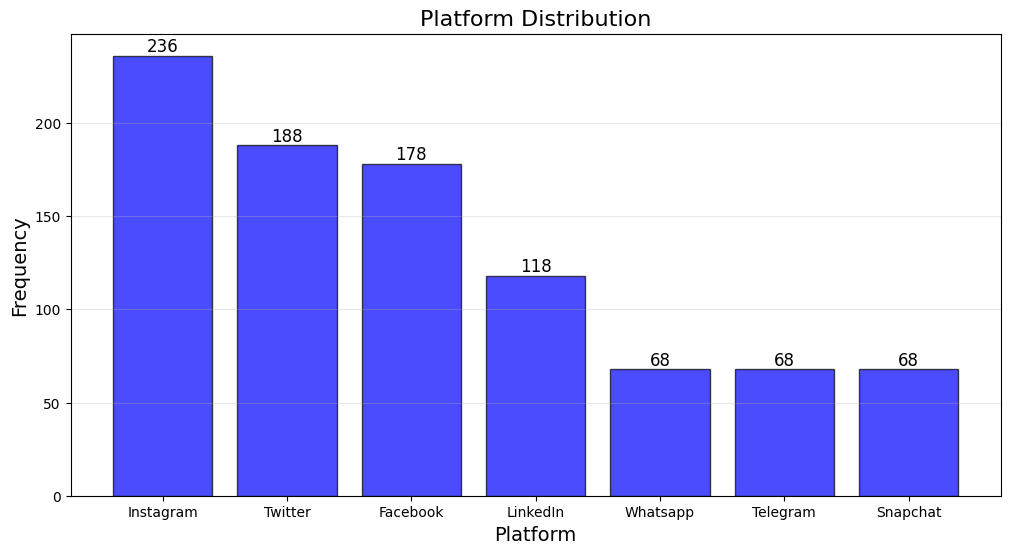

In [ ]:
import matplotlib.pyplot as plt
# Counting the occurrences of each platform
platform_counts = train_df['Platform'].value_counts()

# Creating a bar plot for the 'Platform' column
plt.figure(figsize=(12, 6))
bars = plt.bar(platform_counts.index, platform_counts.values, color='blue', edgecolor='black', alpha=0.7)  # Adjusting color and transparency
plt.title('Platform Distribution', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)  # Adding grid only on y-axis with some transparency

# Adding the number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

# Display the bar plot
plt.show()

Daily Usage Time (minutes) Distribution

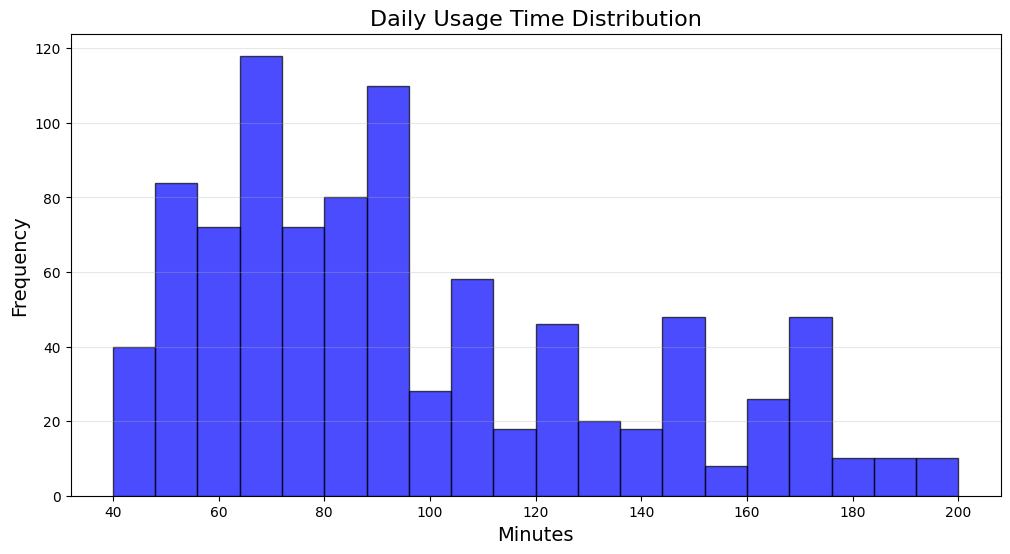

In [ ]:
# Creating the histogram for 'Daily_Usage_Time (minutes)'
plt.figure(figsize=(12, 6))
plt.hist(train_df['Daily_Usage_Time (minutes)'], bins=20, color='blue', edgecolor='black', alpha=0.7)  # Adjusting color and transparency
plt.title('Daily Usage Time Distribution', fontsize=16)
plt.xlabel('Minutes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)  # Adding grid only on the y-axis with some transparency

# Display the histogram
plt.show()

Post Per Day Distribution

In [ ]:
train_df['Posts_Per_Day'].unique()

array([3., 5., 2., 8., 1., 4., 6., 7.])

In [ ]:
# fill nan with mode
train_df['Posts_Per_Day'].fillna(train_df['Posts_Per_Day'].mode()[0], inplace=True)

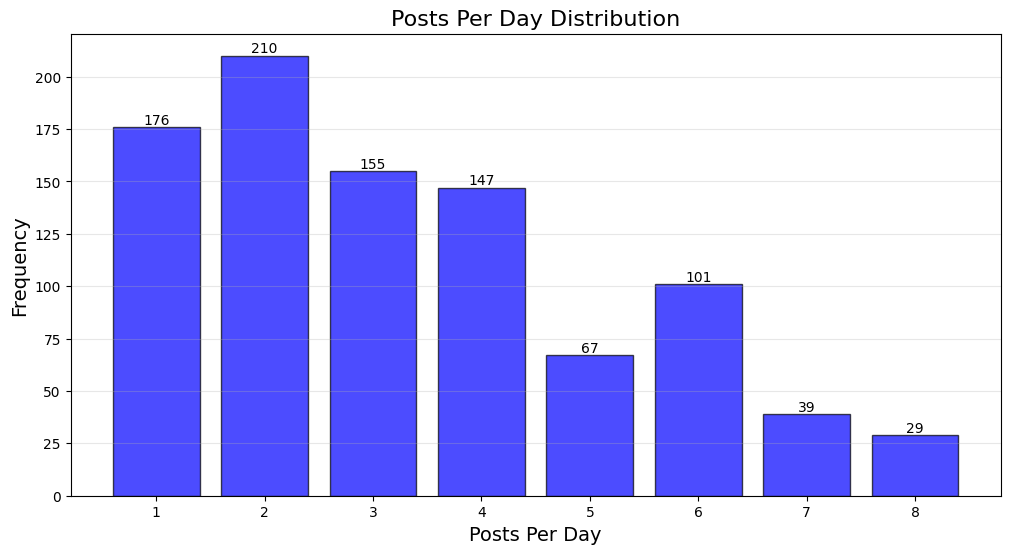

In [ ]:
posts_per_day_counts = train_df['Posts_Per_Day'].value_counts()

# Creating a bar chart for the 'Posts_Per_Day' column
plt.figure(figsize=(12, 6))
plt.bar(posts_per_day_counts.index, posts_per_day_counts.values, color='blue', edgecolor='black', alpha=0.7)
plt.title('Posts Per Day Distribution', fontsize=16)
plt.xlabel('Posts Per Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)  # Adding grid only on y-axis with some transparency

# Adding the number on top of each bar
for i in range(len(posts_per_day_counts)):
    plt.text(posts_per_day_counts.index[i], posts_per_day_counts.values[i], str(posts_per_day_counts.values[i]), ha='center', va='bottom')

# Display the bar chart
plt.show()

Likes Per Day Distribution

In [ ]:
train_df['Likes_Received_Per_Day'].unique()

array([ 45.,  20.,  15., 100.,   5.,  60.,  30.,  25.,  10.,  80.,  35.,
        12.,  90.,  40.,  55.,  33.,   8.,  70.,  28.,  11.,  95.,  18.,
         9.,  85.,  38.,   6.,  13.,  75.,  27.,  88.,  22.,  78.,  29.,
        50.,  36.,  72.,  65., 110.,  14.,  17., 105.,  43.,  37.,  42.,
        48.,  21.,  24.,  23.,  83.])

In [ ]:
# filling nan wih mode
train_df['Likes_Received_Per_Day'].fillna(train_df['Likes_Received_Per_Day'].mode()[0], inplace=True)

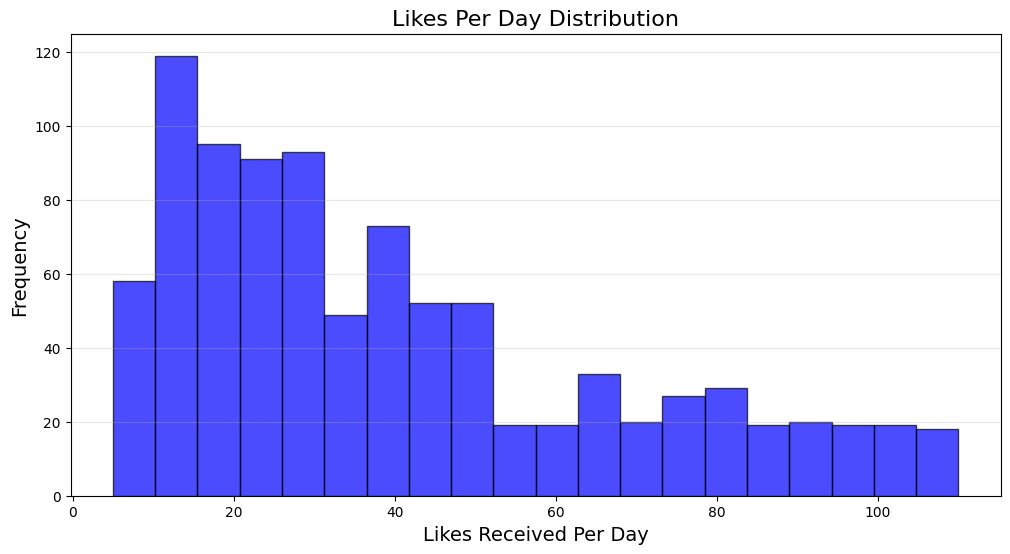

In [ ]:
# Creating the histogram for 'Likes_Received_Per_Day'
plt.figure(figsize=(12, 6))
plt.hist(train_df['Likes_Received_Per_Day'], bins=20, color='blue', edgecolor='black', alpha=0.7)  # Adjusting color and transparency
plt.title('Likes Per Day Distribution', fontsize=16)
plt.xlabel('Likes Received Per Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)  # Adding grid only on the y-axis with some transparency

# Display the histogram
plt.show()

Comments Per Day Distribution

In [ ]:
train_df['Comments_Received_Per_Day'].unique()

array([10., 25.,  5., 30.,  2., 15., 12.,  3., 20.,  7.,  4., 23., 18.,
       22., 14., 26.,  8., 19., 17., 11.,  6.,  9., 13., 40., 16., 35.,
       38., 28., 36., 33.])

In [ ]:
# filling with mode
train_df['Comments_Received_Per_Day'].fillna(train_df['Comments_Received_Per_Day'].mode()[0], inplace=True)

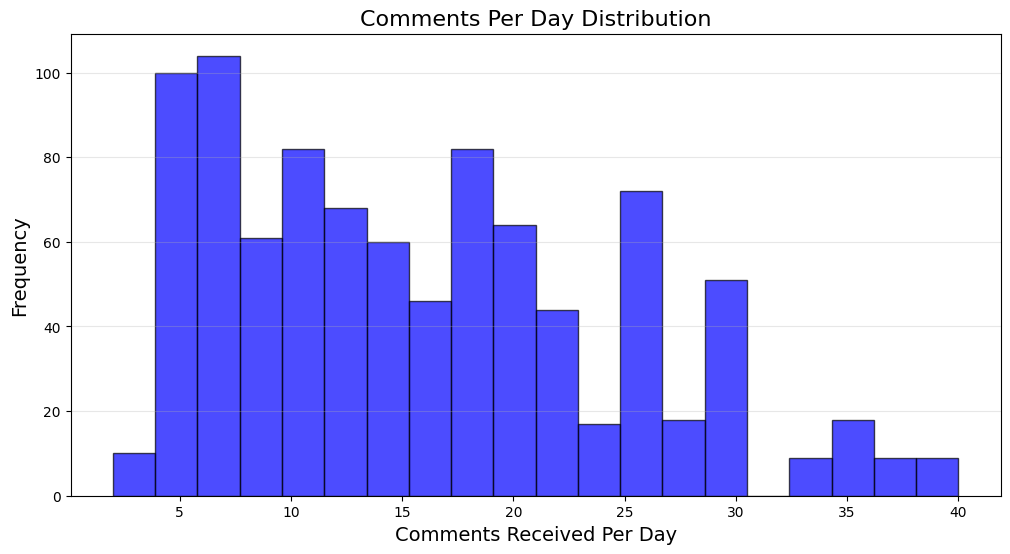

In [ ]:
# Creating the histogram for 'Comments_Received_Per_Day'
plt.figure(figsize=(12, 6))
plt.hist(train_df['Comments_Received_Per_Day'], bins=20, color='blue', edgecolor='black', alpha=0.7)  # Adjusting color and transparency
plt.title('Comments Per Day Distribution', fontsize=16)
plt.xlabel('Comments Received Per Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)  # Adding grid only on the y-axis with some transparency

# Display the histogram
plt.show()

Messages Per Day Distribution

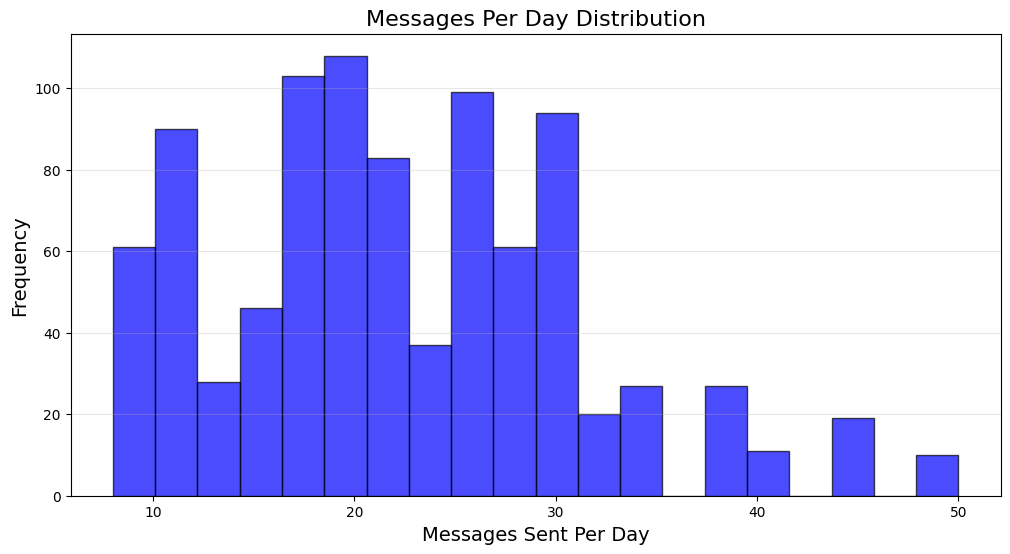

In [ ]:
plt.figure(figsize= (12,6))
plt.hist(train_df['Messages_Sent_Per_Day'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Messages Per Day Distribution', fontsize=16)
plt.xlabel('Messages Sent Per Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)

plt.show()

Emotion Distribution

In [ ]:
train_df['Dominant_Emotion'].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

In [ ]:
# fill nan with mode
train_df['Dominant_Emotion'].fillna(train_df['Dominant_Emotion'].mode()[0], inplace=True)

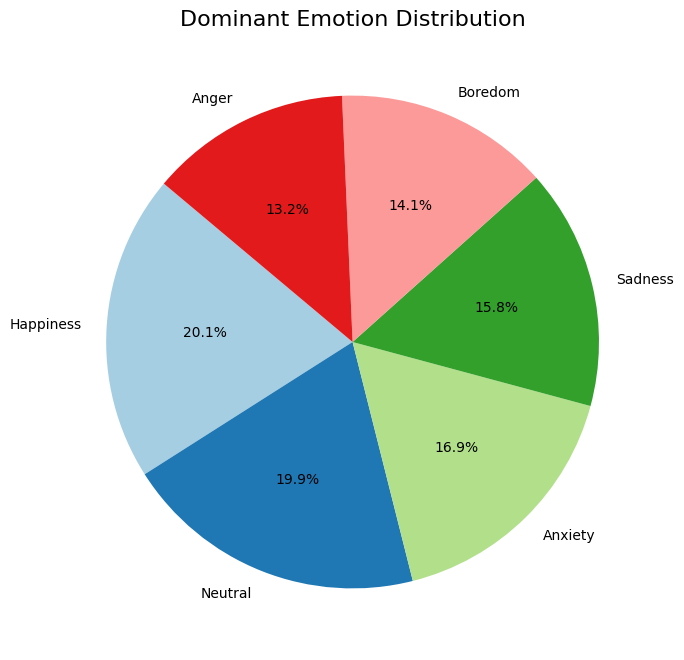

In [ ]:
import matplotlib.pyplot as plt
# Counting the occurrences of each 'Dominant_Emotion'
emotion_counts = train_df['Dominant_Emotion'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Dominant Emotion Distribution', fontsize=16)

# Display the pie chart
plt.show()

**Relationship Between Variables**

Gender and Platform

In [ ]:
# Group the data by gender and platform
grouped = train_df.groupby(['Gender', 'Platform'])

# Count the number of rows in each group
counts = grouped.size()

# Print the counts
print(counts)

Gender      Platform 
Female      Facebook      10
            Instagram    150
            LinkedIn      40
            Snapchat      28
            Twitter       66
            Whatsapp      50
Male        Facebook      38
            Instagram     76
            LinkedIn      48
            Telegram      50
            Twitter      102
            Whatsapp      18
Non-binary  Facebook     130
            Instagram     10
            LinkedIn      30
            Snapchat      40
            Telegram      18
            Twitter       20
dtype: int64


<Figure size 1200x800 with 0 Axes>

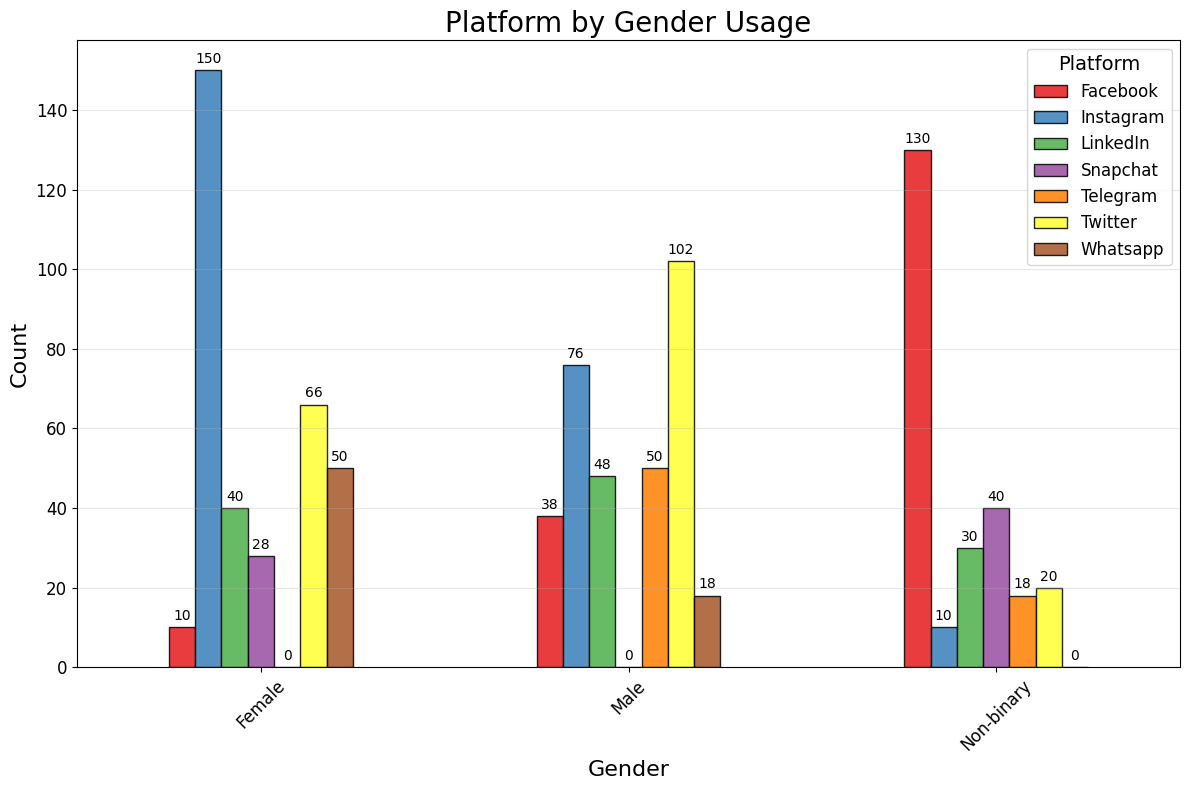

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming train_df is already loaded and contains the necessary data

# Grouping the data by Gender and Platform, then counting the occurrences
platform_gender_counts = train_df.groupby(['Gender', 'Platform']).size().unstack()

# Set a more attractive color palette
colors = sns.color_palette("Set1")

# Creating the bar chart with custom styling
plt.figure(figsize=(12, 8))
ax = platform_gender_counts.plot(kind='bar', figsize=(12, 8), color=colors, edgecolor='black', alpha=0.85)
plt.title('Platform by Gender Usage', fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)  # Adding grid only on the y-axis with some transparency
plt.legend(title='Platform', fontsize=12, title_fontsize=14, loc='upper right')

# Adding labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=10, color='black')

plt.tight_layout()  # Adjust layout to make room for labels
plt.show()



Age and Gender

In [ ]:
# grouping age with gender
grouped = train_df.groupby(['Age', 'Gender'])

# count the number of rows in each group
counts = grouped.size()

# print the counts
print(counts)

Age   Gender    
21.0  Female        20
      Male          10
      Non-binary    26
22.0  Female        48
      Male           8
      Non-binary    18
23.0  Female        10
      Male           8
      Non-binary    30
24.0  Female        26
      Male          10
      Non-binary    28
25.0  Female        40
      Male          24
26.0  Female         8
      Male          28
      Non-binary    30
27.0  Female        28
      Male          44
      Non-binary    20
28.0  Female        36
      Male          28
      Non-binary    28
29.0  Female        28
      Male          30
      Non-binary    32
30.0  Female         8
      Male          40
31.0  Female         8
      Male          54
32.0  Female        28
      Male          10
33.0  Female        18
      Male          10
      Non-binary    28
34.0  Female        18
      Male          10
      Non-binary     8
35.0  Female        20
      Male          18
dtype: int64


In [ ]:
plt = px.histogram(train_df, x='Age', color='Gender', title='Age by Gender')
plt.show()

Gender and Platform VS Daily Usage Time (minutes)

In [ ]:
plt = px.histogram(train_df, x='Posts_Per_Day', y='Platform' ,color='Gender', title='Posts Per Day by Gender')
plt.show()


Gender VS Emotions

In [ ]:
# checking the Gender againest the Dominant_Emotion
grouped = train_df.groupby(['Gender', 'Dominant_Emotion'])

# count the number of rows in each group
counts = grouped.size()

# print the counts
print(counts)

Gender      Dominant_Emotion
Female      Anger                54
            Anxiety              54
            Boredom              30
            Happiness           102
            Neutral              56
            Sadness              48
Male        Anger                58
            Anxiety              56
            Boredom              54
            Happiness            66
            Neutral              46
            Sadness              52
Non-binary  Anger                10
            Anxiety              46
            Boredom              46
            Happiness            18
            Neutral              82
            Sadness              46
dtype: int64


In [ ]:
# ploting
plt = px.histogram(train_df, x='Gender', color='Dominant_Emotion', title='Dominant Emotion by Gender')
plt.show()

Platform VS Emotions

In [ ]:
# checking the Platformagainest the Dominant_Emotion
grouped = train_df.groupby(['Platform', 'Dominant_Emotion'])

# count the number of rows in each group
counts = grouped.size()

# print the counts
print(counts)

Platform   Dominant_Emotion
Facebook   Anxiety              48
           Boredom              34
           Neutral              66
           Sadness              30
Instagram  Anger                 8
           Anxiety              30
           Happiness           160
           Neutral              20
           Sadness              18
LinkedIn   Anxiety              18
           Boredom              70
           Neutral              20
           Sadness              10
Snapchat   Anxiety              16
           Happiness             8
           Neutral              18
           Sadness              26
Telegram   Anger                10
           Anxiety               8
           Boredom               8
           Neutral              26
           Sadness              16
Twitter    Anger                78
           Anxiety              20
           Boredom              18
           Happiness             8
           Neutral              18
           Sadness         

In [ ]:
Plt = px.histogram(train_df, x='Platform', color='Dominant_Emotion', title='Dominant Emotion by Platform')
Plt.show()

Time Spent VS Emotions

In [ ]:
# Daily Usage time by Dominant_Emotion
plt = px.histogram(train_df, x='Daily_Usage_Time (minutes)', color='Dominant_Emotion', title='Time Usage by Dominant Emotion')
plt.show()

# **Model Training**

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [ ]:
# Checking for missing values
train_df.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Platform,0
Daily_Usage_Time (minutes),0
Posts_Per_Day,0
Likes_Received_Per_Day,0
Comments_Received_Per_Day,0
Messages_Sent_Per_Day,0
Dominant_Emotion,0


In [ ]:
# drop the missing values
train_df.dropna(inplace=True)

# **Modeling**

**Transformer**

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, Flatten
from tensorflow.keras.models import Model

# Define features and target
X = train_df.drop(columns=['Dominant_Emotion', 'User_ID'])
y = train_df['Dominant_Emotion']

# Encode target labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the target labels for neural network
y_onehot = to_categorical(y_encoded)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Define preprocessing steps for features
numeric_features = ['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
categorical_features = ['Age', 'Gender', 'Platform']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Preprocess the features
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense if necessary
if not isinstance(X_train, np.ndarray):
    X_train = X_train.toarray()
if not isinstance(X_test, np.ndarray):
    X_test = X_test.toarray()

# Reshape input to 3D for Transformer
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Transformer model
def transformer_encoder(inputs, num_heads, key_dim, ff_dim, dropout_rate):
    # Multi-head self-attention
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(inputs, inputs)
    attention_output = Dropout(dropout_rate)(attention_output)
    attention_output = Add()([attention_output, inputs])
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)

    # Feedforward network
    ff_output = Dense(ff_dim, activation='relu')(attention_output)
    ff_output = Dropout(dropout_rate)(ff_output)
    ff_output = Dense(inputs.shape[-1])(ff_output)
    ff_output = Add()([ff_output, attention_output])
    ff_output = LayerNormalization(epsilon=1e-6)(ff_output)

    return ff_output

# Define input shape
input_shape = X_train.shape[1:]
inputs = Input(shape=input_shape)

# Add Transformer Encoder layers
transformer_output = transformer_encoder(inputs, num_heads=4, key_dim=64, ff_dim=128, dropout_rate=0.1)

# Flatten the output and add final dense layers for classification
flatten_output = Flatten()(transformer_output)
dense_output = Dense(128, activation='relu')(flatten_output)
dense_output = Dropout(0.5)(dense_output)
dense_output = Dense(64, activation='relu')(dense_output)
dense_output = Dropout(0.5)(dense_output)
final_output = Dense(y_onehot.shape[1], activation='softmax')(dense_output)

# Define and compile the model
model = Model(inputs=inputs, outputs=final_output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 1, 30)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_2    │ (None, 1, 30)          │         31,518 │ input_layer_2[0][0],   │
│ (MultiHeadAttention)      │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 1, 30)          │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 1, 30)          │              0 │ dropout_11[0][0],      │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_7     │ (None, 1, 30)          │             60 │ add_4[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 1, 128)         │          3,968 │ layer_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 1, 128)         │              0 │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 1, 30)          │          3,870 │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_5 (Add)               │ (None, 1, 30)          │              0 │ dense_14[0][0],        │
│                           │                        │                │ layer_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_8     │ (None, 1, 30)          │             60 │ add_5[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 30)             │              0 │ layer_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 128)            │          3,968 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 128)            │              0 │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 64)             │          8,256 │ dropout_13[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, 64)             │              0 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 6)              │            390 │ dropout_14[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 52,090 (203.48 KB)

 Trainable params: 52,090 (203.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.2251 - loss: 1.9716 - val_accuracy: 0.4730 - val_loss: 1.4118
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3770 - loss: 1.5310 - val_accuracy: 0.6216 - val_loss: 1.2668
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4145 - loss: 1.4127 - val_accuracy: 0.6622 - val_loss: 1.0880
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4870 - loss: 1.2847 - val_accuracy: 0.7568 - val_loss: 0.9566
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5709 - loss: 1.1696 - val_accuracy: 0.7973 - val_loss: 0.7750
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5964 - loss: 1.0115 - val_accuracy: 0.8514 - val_loss: 0.6641
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7024 - loss: 0.8316 - val_accuracy: 0.8649 - val_loss: 0.5552
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6857 - loss: 0.8589 - val_accuracy: 0.8919 - val_los

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Predict on the test set
y_pred = model.predict(X_test)

# Step 2: Convert predictions and true labels from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Step 3: Generate and print the classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_)
print(report)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
              precision    recall  f1-score   support

       Anger       1.00      0.79      0.88        29
     Anxiety       1.00      1.00      1.00        35
     Boredom       1.00      1.00      1.00        18
   Happiness       1.00      1.00      1.00        43
     Neutral       1.00      1.00      1.00        35
     Sadness       0.81      1.00      0.89        25

    accuracy                           0.97       185
   macro avg       0.97      0.97      0.96       185
weighted avg       0.97      0.97      0.97       185



In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define features and target
X = train_df.drop(columns=['Dominant_Emotion', 'User_ID'])
y = train_df['Dominant_Emotion']

# Encode target labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the target labels for neural network
y_onehot = to_categorical(y_encoded)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Define preprocessing steps for features
numeric_features = ['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
categorical_features = ['Age', 'Gender', 'Platform']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Preprocess the features
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense if necessary
if not isinstance(X_train, np.ndarray):
    X_train = X_train.toarray()
if not isinstance(X_test, np.ndarray):
    X_test = X_test.toarray()

# Reshape input to 3D for BiLSTM
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM, Flatten

# Define the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_onehot.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.2413 - loss: 1.7752 - val_accuracy: 0.3919 - val_loss: 1.7013
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3619 - loss: 1.6677 - val_accuracy: 0.4459 - val_loss: 1.5486
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3837 - loss: 1.5255 - val_accuracy: 0.4459 - val_loss: 1.4718
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3626 - loss: 1.4818 - val_accuracy: 0.5000 - val_loss: 1.4282
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4190 - loss: 1.3969 - val_accuracy: 0.5270 - val_loss: 1.3827
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4175 - loss: 1.4245 - val_accuracy: 0.5405 - val_loss: 1.3383
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4541 - loss: 1.3754 - val_accuracy: 0.6216 - val_loss: 1.2647
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5214 - loss: 1.2887 - val_accuracy: 0.6622 - val

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Predict on the test set
y_pred = model.predict(X_test)

# Step 2: Convert predictions and true labels from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Step 3: Generate and print the classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_)
print(report)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        29
     Anxiety       1.00      0.97      0.99        35
     Boredom       1.00      1.00      1.00        18
   Happiness       1.00      1.00      1.00        43
     Neutral       1.00      1.00      1.00        35
     Sadness       0.96      1.00      0.98        25

    accuracy                           0.99       185
   macro avg       0.99      1.00      0.99       185
weighted avg       0.99      0.99      0.99       185



In [ ]:
import numpy as np
import pandas as pd

# Example data for three new users
new_users_data = [
    {
        'Daily_Usage_Time (minutes)': 120,
        'Posts_Per_Day': 3,
        'Likes_Received_Per_Day': 50,
        'Comments_Received_Per_Day': 15,
        'Messages_Sent_Per_Day': 20,
        'Age': 25,
        'Gender': 'Female',
        'Platform': 'Instagram'
    },
    {
        'Daily_Usage_Time (minutes)': 100,
        'Posts_Per_Day': 2,
        'Likes_Received_Per_Day': 30,
        'Comments_Received_Per_Day': 10,
        'Messages_Sent_Per_Day': 25,
        'Age': 30,
        'Gender': 'Male',
        'Platform': 'Twitter'
    }
]

# Convert the data to a DataFrame
new_users_df = pd.DataFrame(new_users_data)

# Apply the same preprocessing steps as before
new_users_processed = preprocessor.transform(new_users_df)

# Convert to dense array if necessary
if not isinstance(new_users_processed, np.ndarray):
    new_users_processed = new_users_processed.toarray()

# Reshape to match the input shape expected by the model
new_users_processed = np.expand_dims(new_users_processed, axis=1)

# Predict the emotions
predicted_probs = model.predict(new_users_processed)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Decode the predicted classes back to the original labels
predicted_emotions = label_encoder.inverse_transform(predicted_classes)

# Print the predicted emotions
for i, emotion in enumerate(predicted_emotions):
    print(f"The predicted emotion for user {i + 1} is: {emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The predicted emotion for user 1 is: Happiness
The predicted emotion for user 2 is: Anxiety
